In [16]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('house_dataset.csv')  # Ganti dengan path dataset Anda
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (2000, 10)


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


# Eksplorasi Data

- Menampilkan informasi tipe data (info).

- Mengecek jumlah missing value pada setiap kolom.

- Menampilkan statistik deskriptif (describe).

In [3]:
# Cek info dataset
df.info()

# Cek missing values
print("\nMissing Values:\n", df.isnull().sum())

# Statistik deskriptif
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB

Missing Values:
 Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Id,2000.0,1000.5000,577.494589,1.0,500.75,1000.5,1500.25,2000.0
Area,2000.0,2786.2095,1295.146799,501.0,1653.00,2833.0,3887.50,4999.0
Bedrooms,2000.0,3.0035,1.424606,1.0,2.00,3.0,4.00,5.0
Bathrooms,2000.0,2.5525,1.108990,1.0,2.00,3.0,4.00,4.0
Floors,2000.0,1.9935,0.809188,1.0,1.00,2.0,3.00,3.0
YearBuilt,2000.0,1961.4460,35.926695,1900.0,1930.00,1961.0,1993.00,2023.0
Price,2000.0,537676.8550,276428.845719,50005.0,300098.00,539254.0,780086.00,999656.0


## Cek data duplikat dan penangannya

In [4]:
# Add this after missing values check
print("\nNumber of duplicates:", df.duplicated().sum())
df = df.drop_duplicates()


Number of duplicates: 0


## Deteksi Outliers


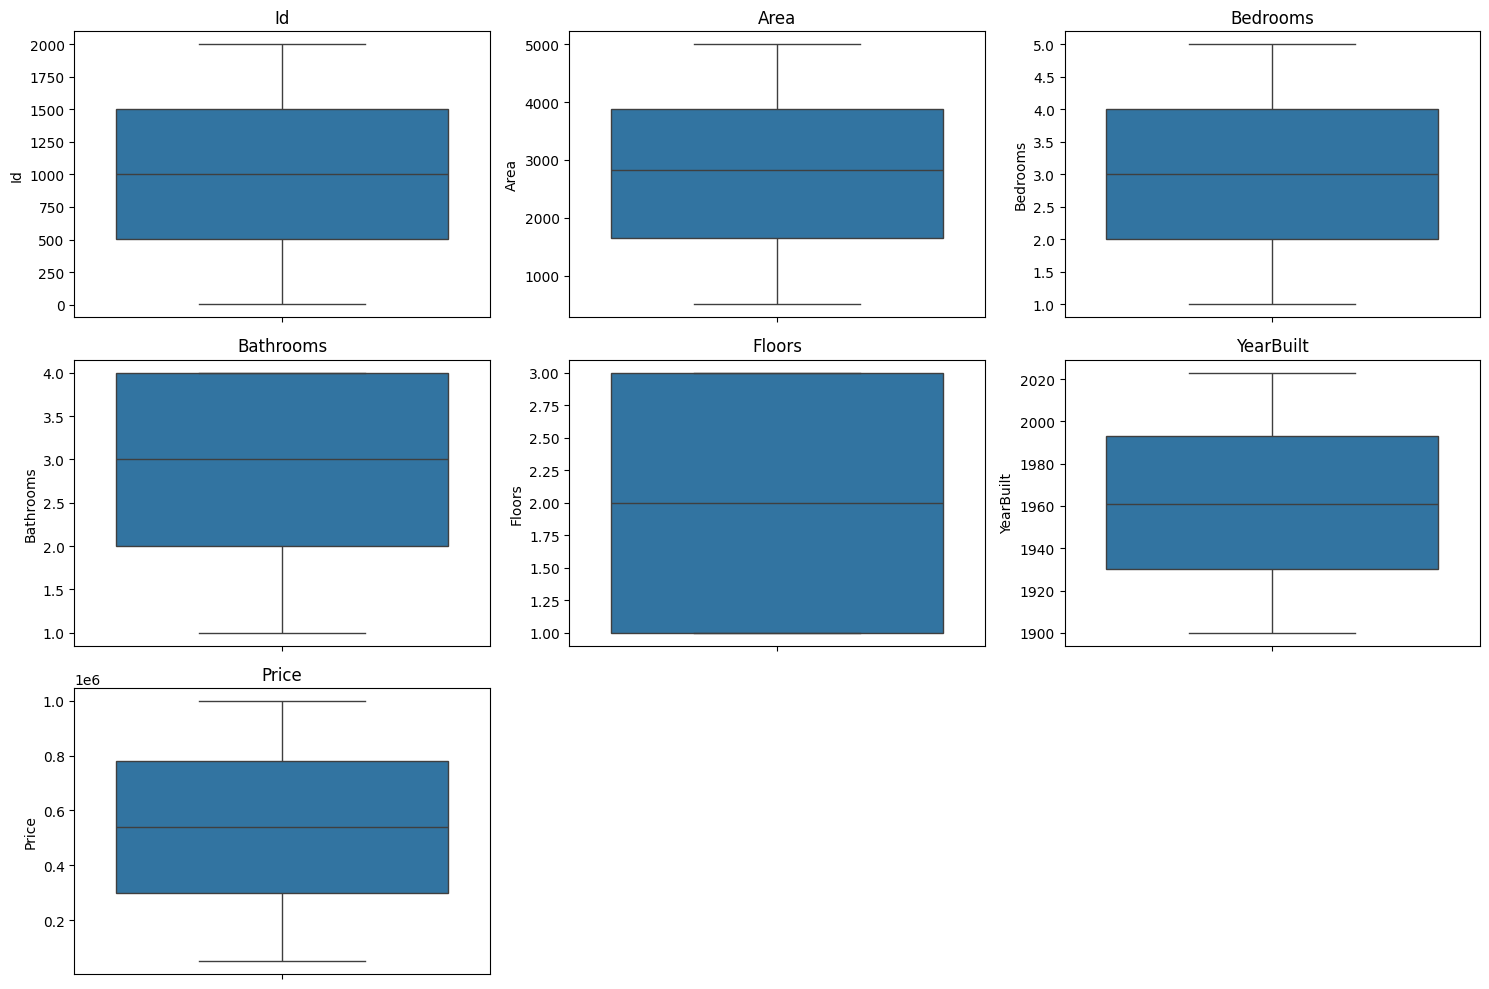

In [5]:
# Add this after descriptive statistics
# Boxplot for numerical features to detect outliers
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Gambar tersebut menampilkan **boxplot** dari beberapa fitur dalam sebuah dataset properti atau rumah, yang membantu melihat distribusi data, nilai tengah (median), serta deteksi outlier. Berikut penjelasan dari masing-masing boxplot:

1. **Id**

   * Menunjukkan distribusi dari ID unik tiap properti.
   * Terlihat menyebar merata dari angka rendah ke tinggi tanpa outlier yang signifikan.

2. **Area**

   * Menunjukkan luas bangunan/tanah.
   * Median ada di sekitar 3000.
   * Terdapat beberapa properti dengan luas lebih tinggi (outlier di bagian atas).

3. **Bedrooms**

   * Mayoritas rumah memiliki 2–4 kamar tidur.
   * Terdapat beberapa outlier dengan jumlah kamar tidur lebih dari 5.

4. **Bathrooms**

   * Median sekitar 3 kamar mandi.
   * Terdapat rumah dengan hanya 1 kamar mandi dan beberapa outlier di atas 4.

5. **Floors**

   * Kebanyakan rumah memiliki 1 atau 2 lantai.
   * Ada rumah dengan 3 lantai sebagai outlier.

6. **YearBuilt**

   * Menunjukkan tahun rumah dibangun.
   * Sebagian besar rumah dibangun antara tahun 1920–2000.
   * Ada outlier untuk rumah sangat lama atau sangat baru.

7. **Price**

   * Menunjukkan harga properti.
   * Median harga sekitar 500.000–600.000.
   * Ada outlier untuk properti dengan harga lebih dari 1 juta (1e6).




# Visualisasi Data
- Menampilkan distribusi harga (Price) menggunakan histogram dengan seaborn.

- Membuat correlation heatmap antar fitur numerik untuk melihat keterkaitan antar fitur.

- Membuat boxplot untuk fitur kategorikal terhadap harga, agar melihat pengaruh kategori terhadap Price.

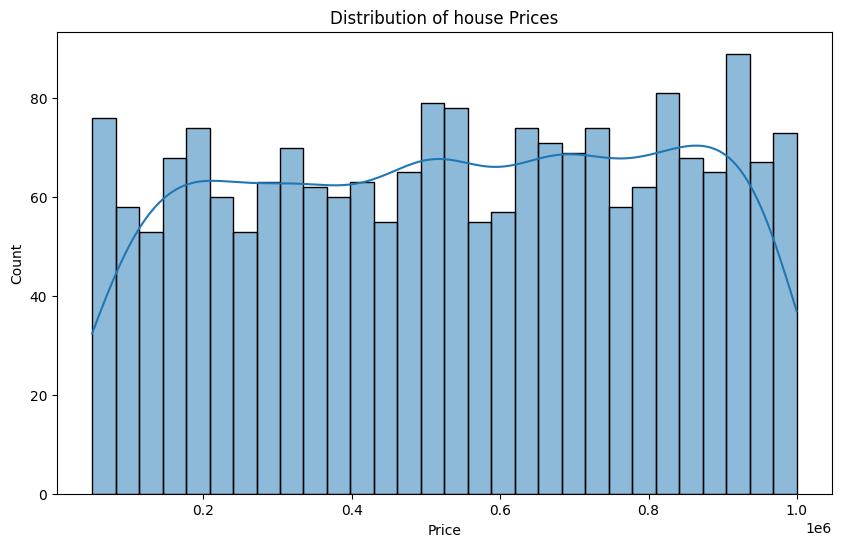

In [6]:
# Visualisasi distribusi harga (target)
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title("Distribution of house Prices")
plt.show()


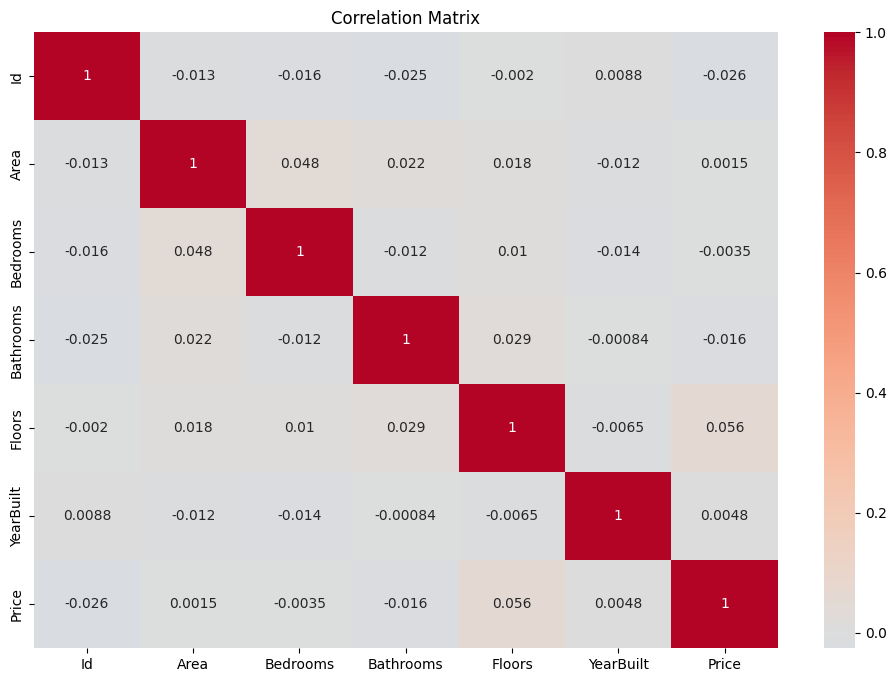

In [7]:
# Korelasi fitur numerik dengan harga
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

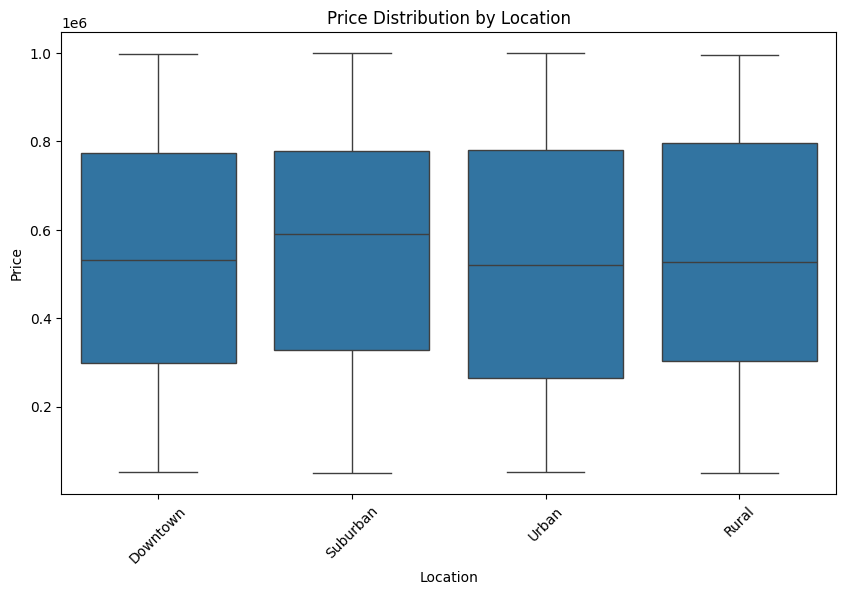

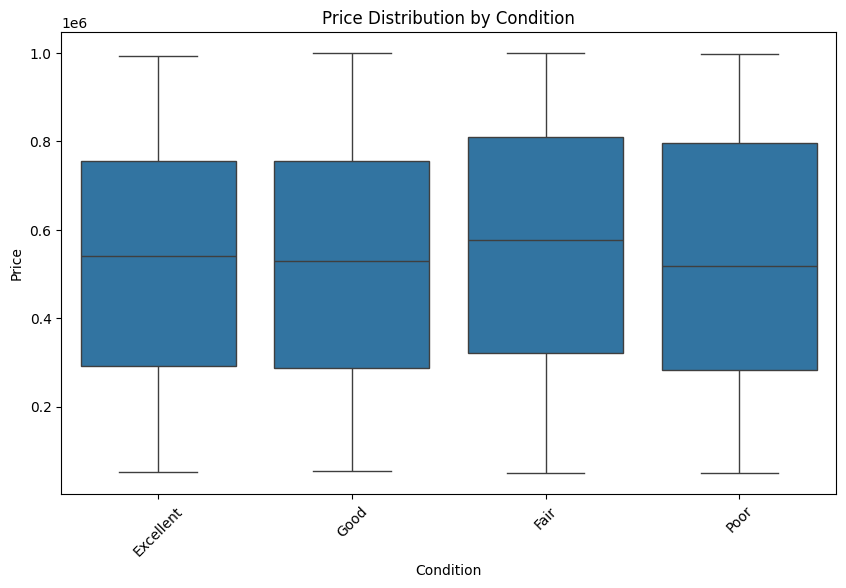

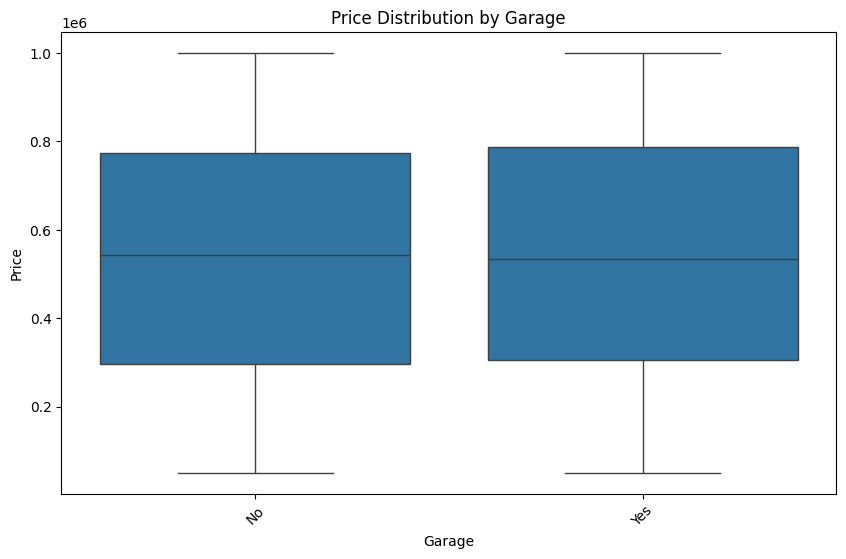

In [8]:

# Analisis fitur kategorik
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='Price', data=df)
    plt.title(f"Price Distribution by {feature}")
    plt.xticks(rotation=45)
    plt.show()

# Preprocessing Data
- Menghapus kolom Id yang tidak diperlukan.

- Memisahkan fitur numerik dan kategorikal.

- Membuat preprocessing pipeline:

  - Numerik: distandarisasi (StandardScaler).

  - Kategorikal: dikodekan dengan One-Hot Encoding (OneHotEncoder).

- Membuat ColumnTransformer untuk menggabungkan pipeline numerik dan kategorikal.

In [9]:
# Drop kolom yang tidak diperlukan (Id)
df = df.drop('Id', axis=1)


In [10]:
# Pisahkan fitur kategorikal dan numerik
categorical_features = df.select_dtypes(include=['object']).columns
numeric_features = df.select_dtypes(exclude=['object']).drop('Price', axis=1).columns

In [14]:
processed_df = df

In [17]:
scaler = MinMaxScaler()
processed_df[numeric_features] = scaler.fit_transform(processed_df[numeric_features])


In [22]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

label_encoder = OneHotEncoder(sparse_output=False) # Set sparse_output to False to get a dense array
encoded_features = label_encoder.fit_transform(processed_df[categorical_features])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=label_encoder.get_feature_names_out(categorical_features))

# Drop the original categorical features
processed_df = processed_df.drop(categorical_features, axis=1)

# Concatenate the processed_df with the new encoded_df
processed_df = pd.concat([processed_df, encoded_df], axis=1)

In [23]:
processed_df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price,Location_Downtown,Location_Rural,Location_Suburban,Location_Urban,Condition_Excellent,Condition_Fair,Condition_Good,Condition_Poor,Garage_No,Garage_Yes
0,0.190974,1.00,1.000000,1.0,0.569106,149919,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.838373,1.00,1.000000,1.0,0.471545,424998,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.687194,0.25,0.333333,1.0,0.308943,266746,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.103379,0.75,0.333333,0.5,0.016260,244020,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.983771,0.00,1.000000,0.5,0.609756,636056,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
